# Part B CA1: Regression
Name: Rachel Tan Min Zhi <br>
Class: DAAA/FT/2A/03 <br>
Admission No.: p2011802

**Prediction Task**: Predict the house sale prices according to the features of the house.<br>
The output variable is the predicted sale price of a house. By comparing it to the actual sale price, it determines how well the model has performed.

### **Table of Contents**
1. Load Libraries & Dataset
2. EDA
3. Feature Engineering
4. Model Training
5. Model Evaluation (Interim)
6. Model Improvment<br>
    a. Cross Validation<br>
    b. Hyperparameter Tuning<br>
7. Model Evaluation (After tuning models)
8. Feature Importance of certain classifiers
9. Conclusion

# Load Libraries

In [1]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Train test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# Regressors
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

# Evaluate model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pickle

# Load Dataset

In [2]:
data = pd.read_csv('./dataset/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# EDA

**Summary of the King County House Sale Price Data**<br>
No. of records: 21,613 <br>
No. of columns: 21 <br>
No missing data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Converted the date column from an object data type to a datetime data type.

In [4]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

**Descriptive Statistics about the King County House Sale Data**

In [5]:
data.describe(datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


Extracted the year, month and day from the date column and added them as 3 columns to represent the date.

In [6]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


## Removing unnecessary columns 
I removed `id` column because its an identifier, `date`, `sqft_above` & `sqft_basement` as the sum of these 2 variables is the value in the `sqft_living`.

In [7]:
data.drop(['id', 'date', 'sqft_above', 'sqft_basement'], axis = 1, inplace = True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


## Visualisations

**Heatmap** to show the correlation between variables. I focused on the correlation between price and the other features.

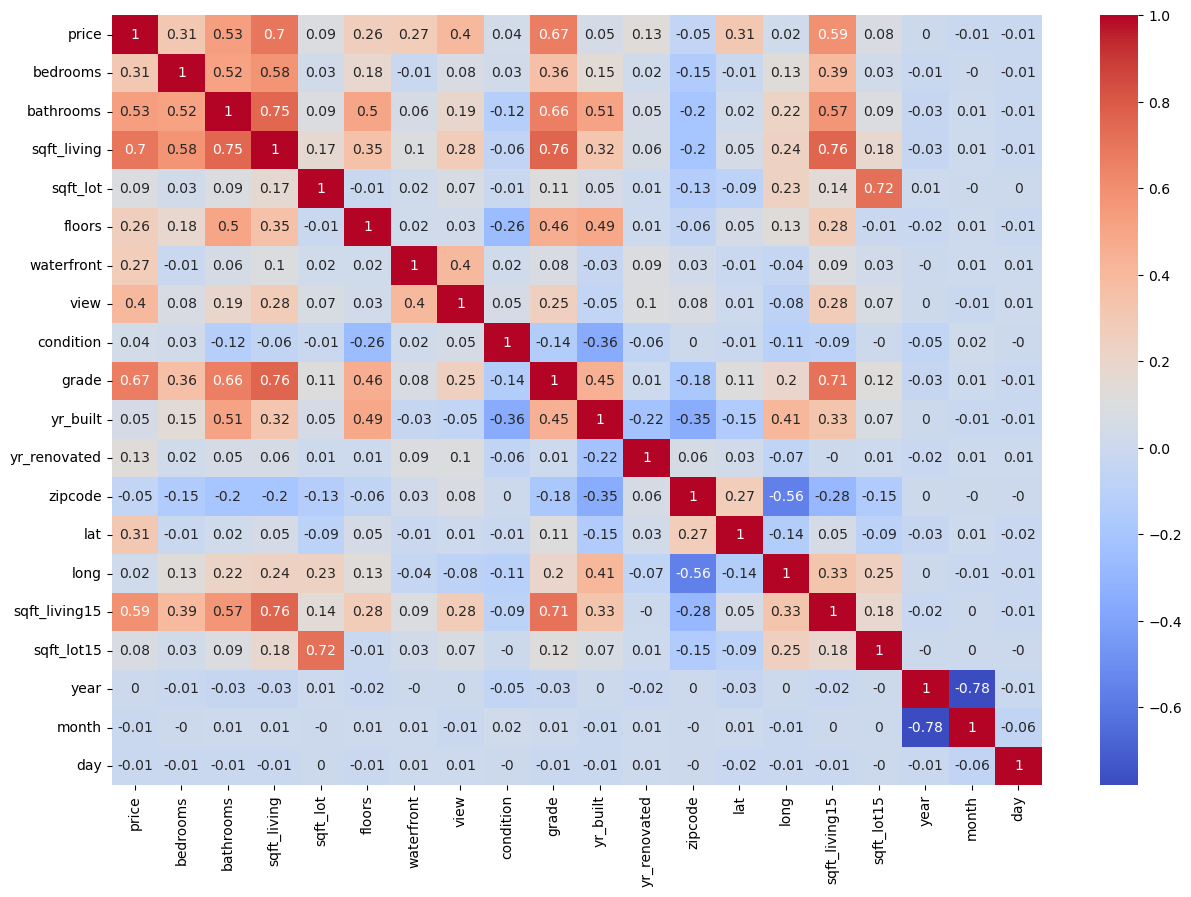

In [8]:
corr_matrix = data.corr().round(2)
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

**Insights**: From the plot above, features with the highest correlation to price:
- bathrooms
- sqft_living
- grade
- sqft_living15

**Pair plot** on features with the highest correlation to the price.<br>

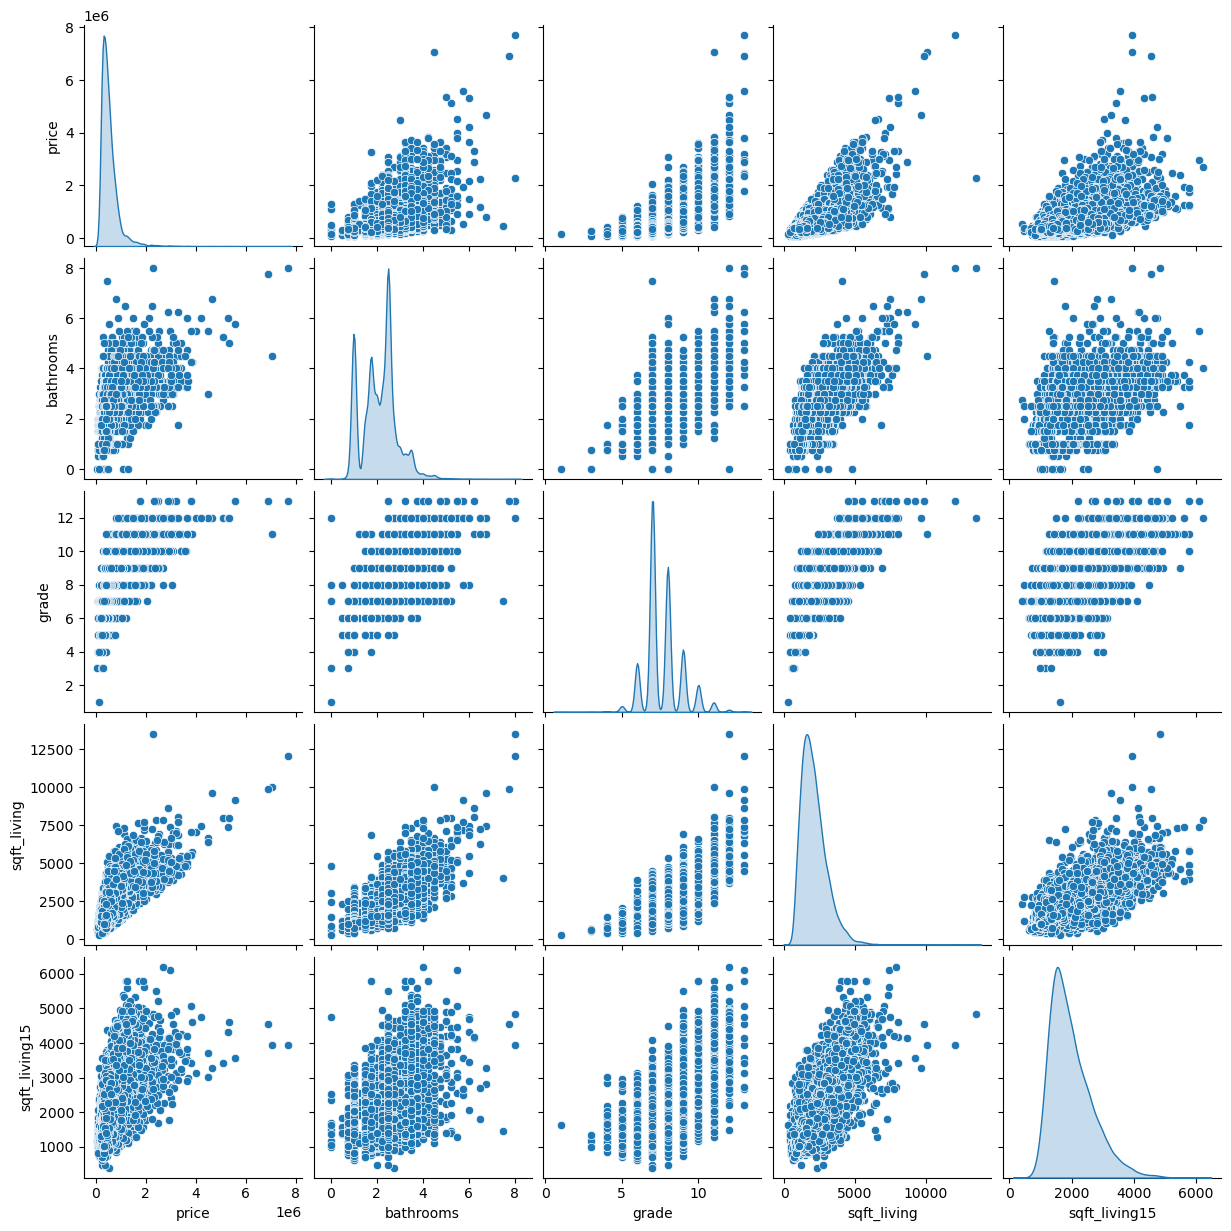

In [9]:
high_corr_data = data[['price', 'bathrooms', 'grade', 'sqft_living', 'sqft_living15']]
g = sns.pairplot(high_corr_data, diag_kind = 'kde')
plt.show()

**Insights**: From the plot above, all of these features are positively related to price. Furthermore, the features containing continuous data are right-skewed.

## Handling Skewed Data
The data on price is positively skewed. Thus, the tail region might be represented as outliers, which will affect the model's performance. Thus, I normalised the prices and updated the column in the dataframe.

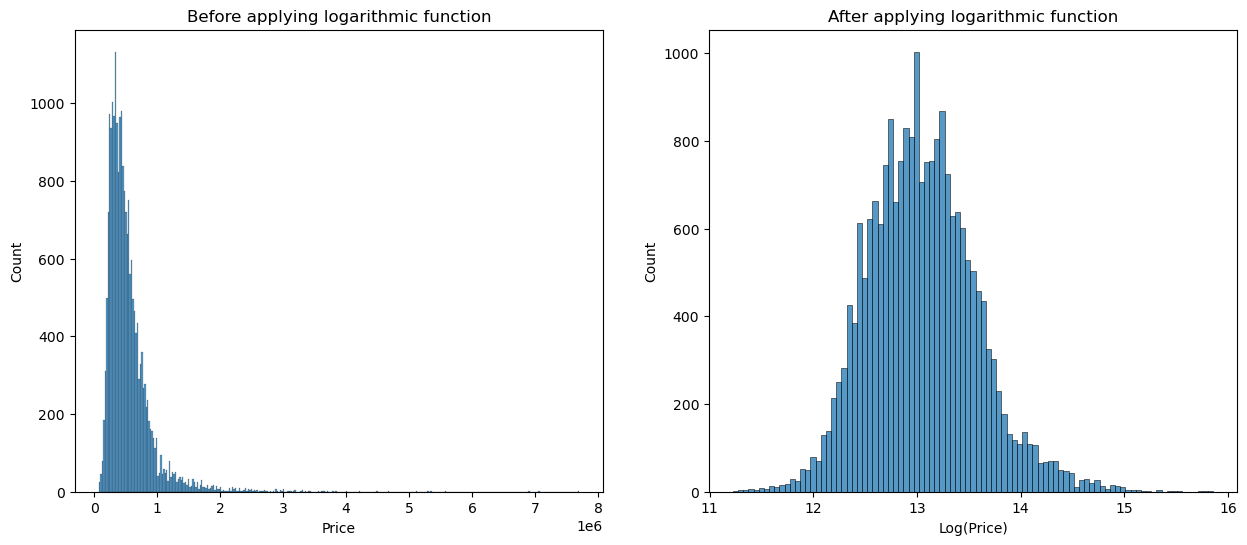

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
# plot before applying log function
sns.histplot(data['price'], ax = ax1)
ax1.set_xlabel('Price')
ax1.set_title('Before applying logarithmic function')

# plot after applying log function
sns.histplot(np.log(data['price']), ax = ax2)
ax2.set_xlabel('Log(Price)')
ax2.set_title('After applying logarithmic function')
plt.show()

# Replace price column with updated price
data['price'] = np.log(data['price'])

## Visualising Outliers
Purpose: To observe the distribution and the amount of outliers for each feature.

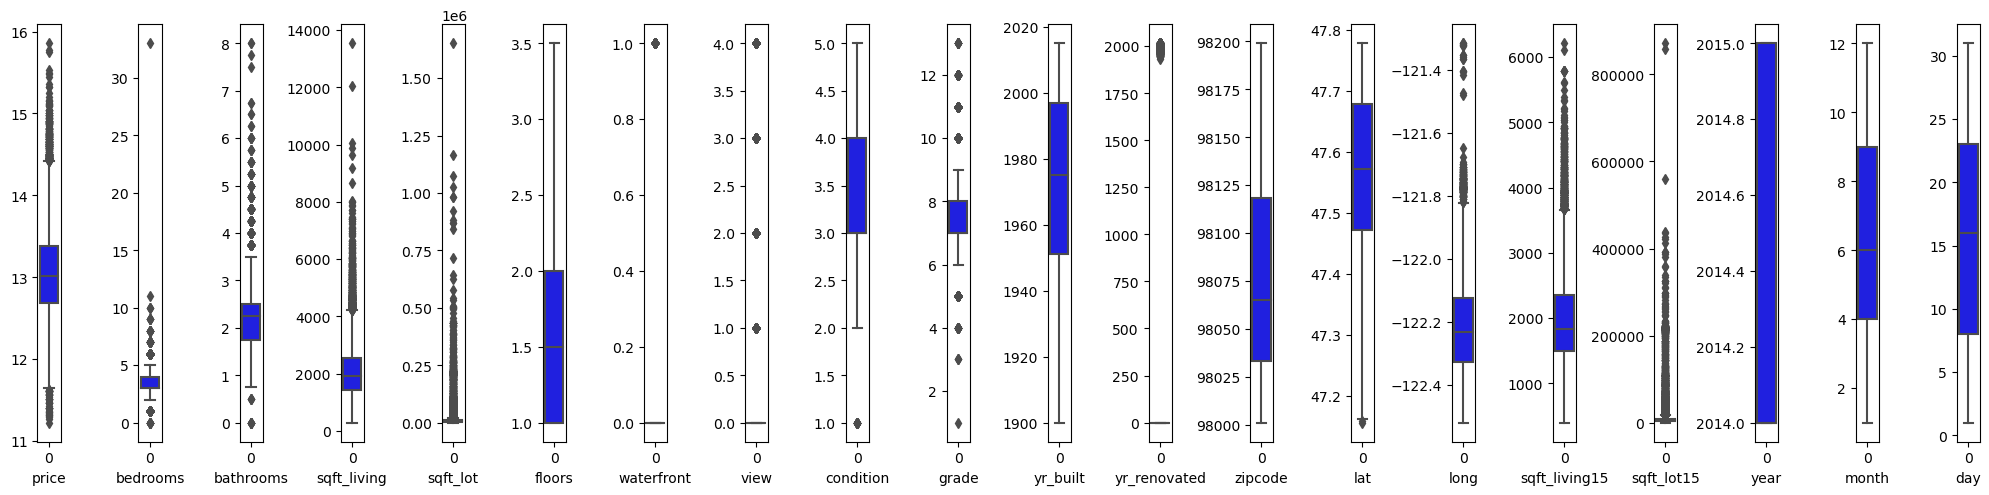

In [11]:
cols = data.columns.values
num_cols = len(cols)
num_rows = int(len(cols)-1 / num_cols)
plt.figure(figsize=(num_cols, num_rows*5))
for i in range(0,len(cols)):
    plt.subplot(num_rows + 1,num_cols,i+1)
    sns.boxplot(data = data[cols[i]], color='blue')
    plt.xlabel(cols[i])
    plt.tight_layout()

I noticed there's a data point that is very far apart from the other data points. Hence, I checked on it. It has 33 bedrooms with a living room of 1620 square foot and price of around 640000 (After applying the exponential function to 13.369223). If there are 33 bedrooms the space and price should be much larger. Thus, I removed it because it is too suspicious to be a real data point.

In [12]:
data.sort_values(by = 'bedrooms', ascending = False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
15870,13.369223,33,1.75,1620,6000,1.0,0,0,5,7,1947,0,98103,47.6878,-122.331,1330,4700,2014,6,25
8757,13.161584,11,3.00,3000,4960,2.0,0,0,3,7,1918,1999,98106,47.5560,-122.363,1420,4960,2014,8,21
15161,13.384728,10,2.00,3610,11914,2.0,0,0,4,7,1958,0,98006,47.5705,-122.175,2040,11914,2014,10,29
13314,13.955273,10,5.25,4590,10920,1.0,0,2,3,9,2008,0,98004,47.5861,-122.113,2730,10400,2014,8,14
19254,13.399995,10,3.00,2920,3745,2.0,0,0,4,7,1913,0,98105,47.6635,-122.320,1810,3745,2014,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,11.863582,0,0.00,290,20875,1.0,0,0,1,1,1963,0,98024,47.5308,-121.888,1620,22850,2014,9,26
8484,12.388394,0,2.50,1810,5669,2.0,0,0,3,7,2003,0,98038,47.3493,-122.053,1810,5685,2014,9,25
875,13.910821,0,0.00,3064,4764,3.5,0,2,3,7,1990,0,98102,47.6362,-122.322,2360,4000,2014,6,12
8477,12.736554,0,2.50,2290,8319,2.0,0,0,3,8,1985,0,98042,47.3473,-122.151,2500,8751,2014,11,17


In [13]:
data.drop(index = 15870, inplace = True)

According to the boxplots, the columns related to square feet were positively-skewed. Thus, I deskewed data of these columns by applying log function.

In [14]:
data['sqft_living'] = np.log(data['sqft_living'])
data['sqft_lot'] = np.log(data['sqft_lot'])
data['sqft_living15'] = np.log(data['sqft_living15'])
data['sqft_lot15'] = np.log(data['sqft_living15'])

Defined features and target.

In [15]:
X = data.drop(['price'], axis = 1)
y = data['price']

Split data with 70% train data and 30% test data.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Feature Engineering

## Feature Selection
I calculated the correlation scores and p-values of the variables using F-test regression. The purpose was to test if the features in my model are significant by comparing my model to a model with no predictors.<br>
$H_{0}$: A model with no independent variables fits the data as well as my model.<br>
$H_{1}$: A model with no independent variables does not fit the data as well as my model.<br>
If P-value <= 0.05, I will reject $H_{0}$ and use the feature in my model.

In [17]:
# used f-test regression to calculate the scores
fs = SelectKBest(score_func=f_regression, k='all')
# fit model
fs.fit(X_train, y_train)
# store correlation scores and p-value in a dataframe
features = pd.DataFrame(tuple(zip(X.columns, fs.scores_, fs.pvalues_)), 
                     columns = ['Feature', 'Correlation Scores', 'P-values']).sort_values('Correlation Scores', ascending = False).reset_index(drop = True)
features

,Feature,Correlation Scores,P-values
0,grade,14474.704690,0.000000e+00
1,sqft_living,12335.304130,0.000000e+00
2,sqft_living15,8539.470947,0.000000e+00
3,sqft_lot15,8390.601259,0.000000e+00
4,bathrooms,6504.853380,0.000000e+00
5,lat,3839.099032,0.000000e+00
6,bedrooms,2143.797075,0.000000e+00
7,view,1877.147672,0.000000e+00
8,floors,1571.161465,0.000000e+00
9,waterfront,462.608348,4.229761e-101


Removed features that have a p-value of more than 5% as they will not be useful in the prediction.

In [18]:
insignificant = features[features['P-values']>0.05]['Feature']
str_insignificant = ', '.join(insignificant)
print(f'Features with very weak association with the house sale price: {str_insignificant}')
X_train.drop(insignificant, axis = 1, inplace = True)
X_test.drop(insignificant, axis = 1, inplace = True)

Features with very weak association with the house sale price: day, month, year


Plotted a **point plot** to observe the correlation scores between the house sale price and the features.

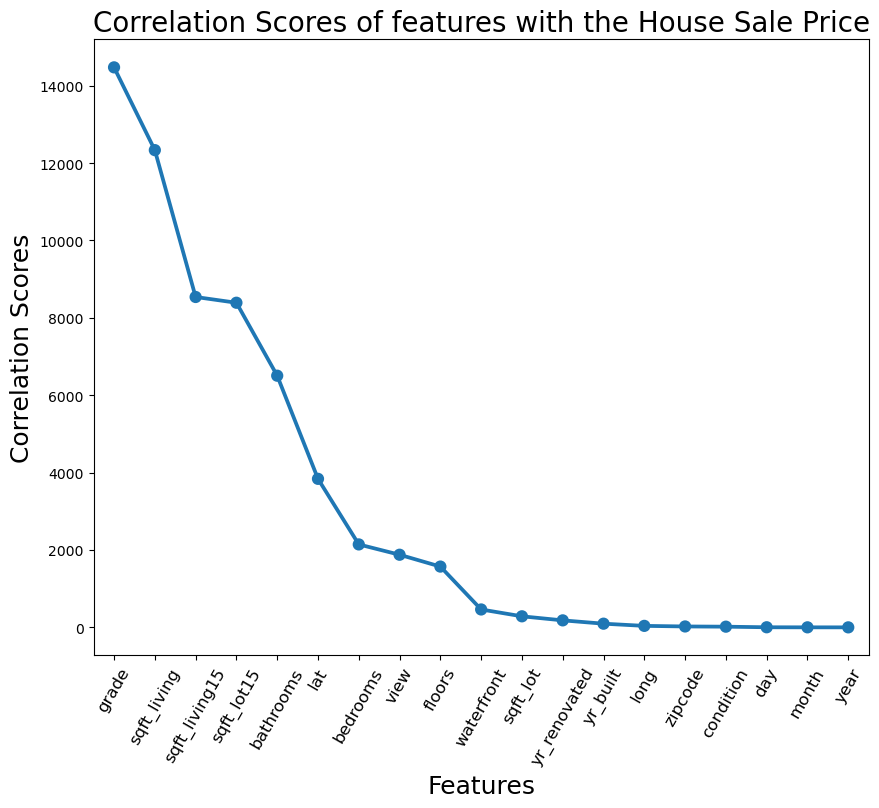

In [19]:
plt.figure(figsize = (10, 8))
sns.pointplot(data = features, x = 'Feature', y = 'Correlation Scores')
plt.xticks(rotation = 60, fontsize = 12)
plt.xlabel('Features', fontsize = 18)
plt.ylabel('Correlation Scores', fontsize = 18)
plt.title('Correlation Scores of features with the House Sale Price', fontsize = 20)
plt.show()

**Insights**: The grade and most of the features related to the square foot have a high correlation with the price.

# Model Training

Defined a `train_model` function which takes in the algorithm as a parameter and trains the model to predict house sale prices. <br>
The function will do the following:
1. Fit the model to the train data, make predictions and evaluates the model's performance though the r2_score method.
2. Return the accuracy scores of the test and train sets, error values, residuals, predicted values of the test set

**Error evaluation metrics**<br>
To compare the accuracy of predictions across regressors, I used Root Mean Squared Error (RMSE) which measures the standard deviation of residuals as it has the same units as the target variable. Since there is a presence of outliers in the dataset, I used Mean Absolute Error (MAE) as it is more robust to data with outliers.

In [20]:
def train_model(model):
    # Fit the model to the train set
    model.fit(X_train, y_train)
    # Predict house sale prices of train and test set
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    # Calculate accuracy of predictions
    test_score = r2_score(y_test, y_hat_test)
    train_score = r2_score(y_train, y_hat_train)
    # Calculate errors
    rmse = mean_squared_error(y_test, y_hat_test, squared = False)
    mae = mean_absolute_error(y_test, y_hat_test)
    # Calculate residuals
    residuals = y_test - y_hat_test
    # Store the accuracy scores and error metrics in a list
    metrics = [test_score*100, train_score*100, rmse, mae]
    return metrics, residuals, y_hat_test

## Baseline Model
Created a baseline model using Linear Regression. I used cross validation to calculate the accuracy and took the average score.

In [21]:
baseline = LinearRegression()
cv_score = cross_val_score(baseline, X, y, cv = 5)
avg_score = np.mean(cv_score)
print(f'Baseline model accuracy score: {avg_score*100:.3f}%')

Baseline model accuracy score: 77.076%


## Initialise Algorithms
**Reasons for choosing algorithms**<br>
1) **Ridge Regressor**: To penalise the model using L2 regularisation to avoid overfitting so the model can generalise better to unseen data.<br>
2) **Decision Tree**: The algorithm trains efficiently at a high speed and its output is simpler to understand as it can be visualised using a graph. Furthermore, it has the capability to use different rules and subsets of data for each node in the tree. Thus, it is able to show which features are the ones that play a significant role in making decisions. However, it is prone to overfitting when the the tree is very deep as the number of samples decreases which increases the specificity.<br>
3) **Gradient Boosting Regressor**: To achieve a high accuracy using boosting. It is a boosted decision tree, thus it works in a way that the subsequent trees correct the errors of the previous trees, increasing the performance of the model. <br>
4) **Bagging Regressor**: To achieve a high accuracy using bagging. Also, it helps to reduce variance and avoid overfitting through training all models in an ensemble vote and combining all the models to smoothen out their predictions.

In [23]:
# I set the regularisation strength to 0.01
RD = Ridge(alpha = 0.01, random_state = 1)
DT = DecisionTreeRegressor(random_state = 1)
GB = GradientBoostingRegressor(random_state = 1)
BR = BaggingRegressor(random_state = 1)

Used Pipelines to apply transformers to the data and fit the data into the estimator. I used the StandardScalar transformer to standardise features.

In [24]:
pipelines = []
pipelines.append(('ScaledRD', Pipeline([('Scaler', StandardScaler()),('RD', RD)])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('CART', DT)])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GB)])))
pipelines.append(('ScaledBR', Pipeline([('Scaler', StandardScaler()),('BR', BR)])))

In [25]:
# passed models into the train_model function
pipe_results = [train_model(model) for name, model in pipelines]

# store and presented results in a dataframe
metrics = pd.DataFrame([res[0] for res in pipe_results], columns = ['Test Score', 'Train Score', 'RMSE', 'MAE'],
                      index = ['Ridge Regressor', 'Decision Tree', 'Gradient Boosting', 'Bagging Regressor'])
metrics

,Test Score,Train Score,RMSE,MAE
Ridge Regressor,77.858144,76.916567,0.252500,0.195071
Decision Tree,78.000168,99.739373,0.251689,0.180212
Gradient Boosting,88.129755,88.569145,0.184878,0.134810
Bagging Regressor,87.872195,97.553868,0.186873,0.133695


In [26]:
filename = './models/house.sav'
pickle.dump(GB, open(filename, 'wb'))

In [27]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_test)

array([14.76667922, 14.76667922, 14.77584828, ..., 14.77001354,
       14.76667922, 14.88293435])

Gradient Boosting Regressor performed the best on the test data set. The difference in train and test accuracy scores is large for the Decision Tree and Bagging Regressors. There is a small difference of less than 1% between the train and test scores of the Ridge and Gradient Boosting Regressors.

## <center>Decision Tree Plot<center>

Visual representation of the decision tree and the features used to make its decisions. I showed only a maximum depth of 3 as the tree is very deep and I wanted to focus on the features it used at the start of the tree. From the tree plot these features are: `grade`, `lat`, `sqft_living`, `yr_built`, `long`.

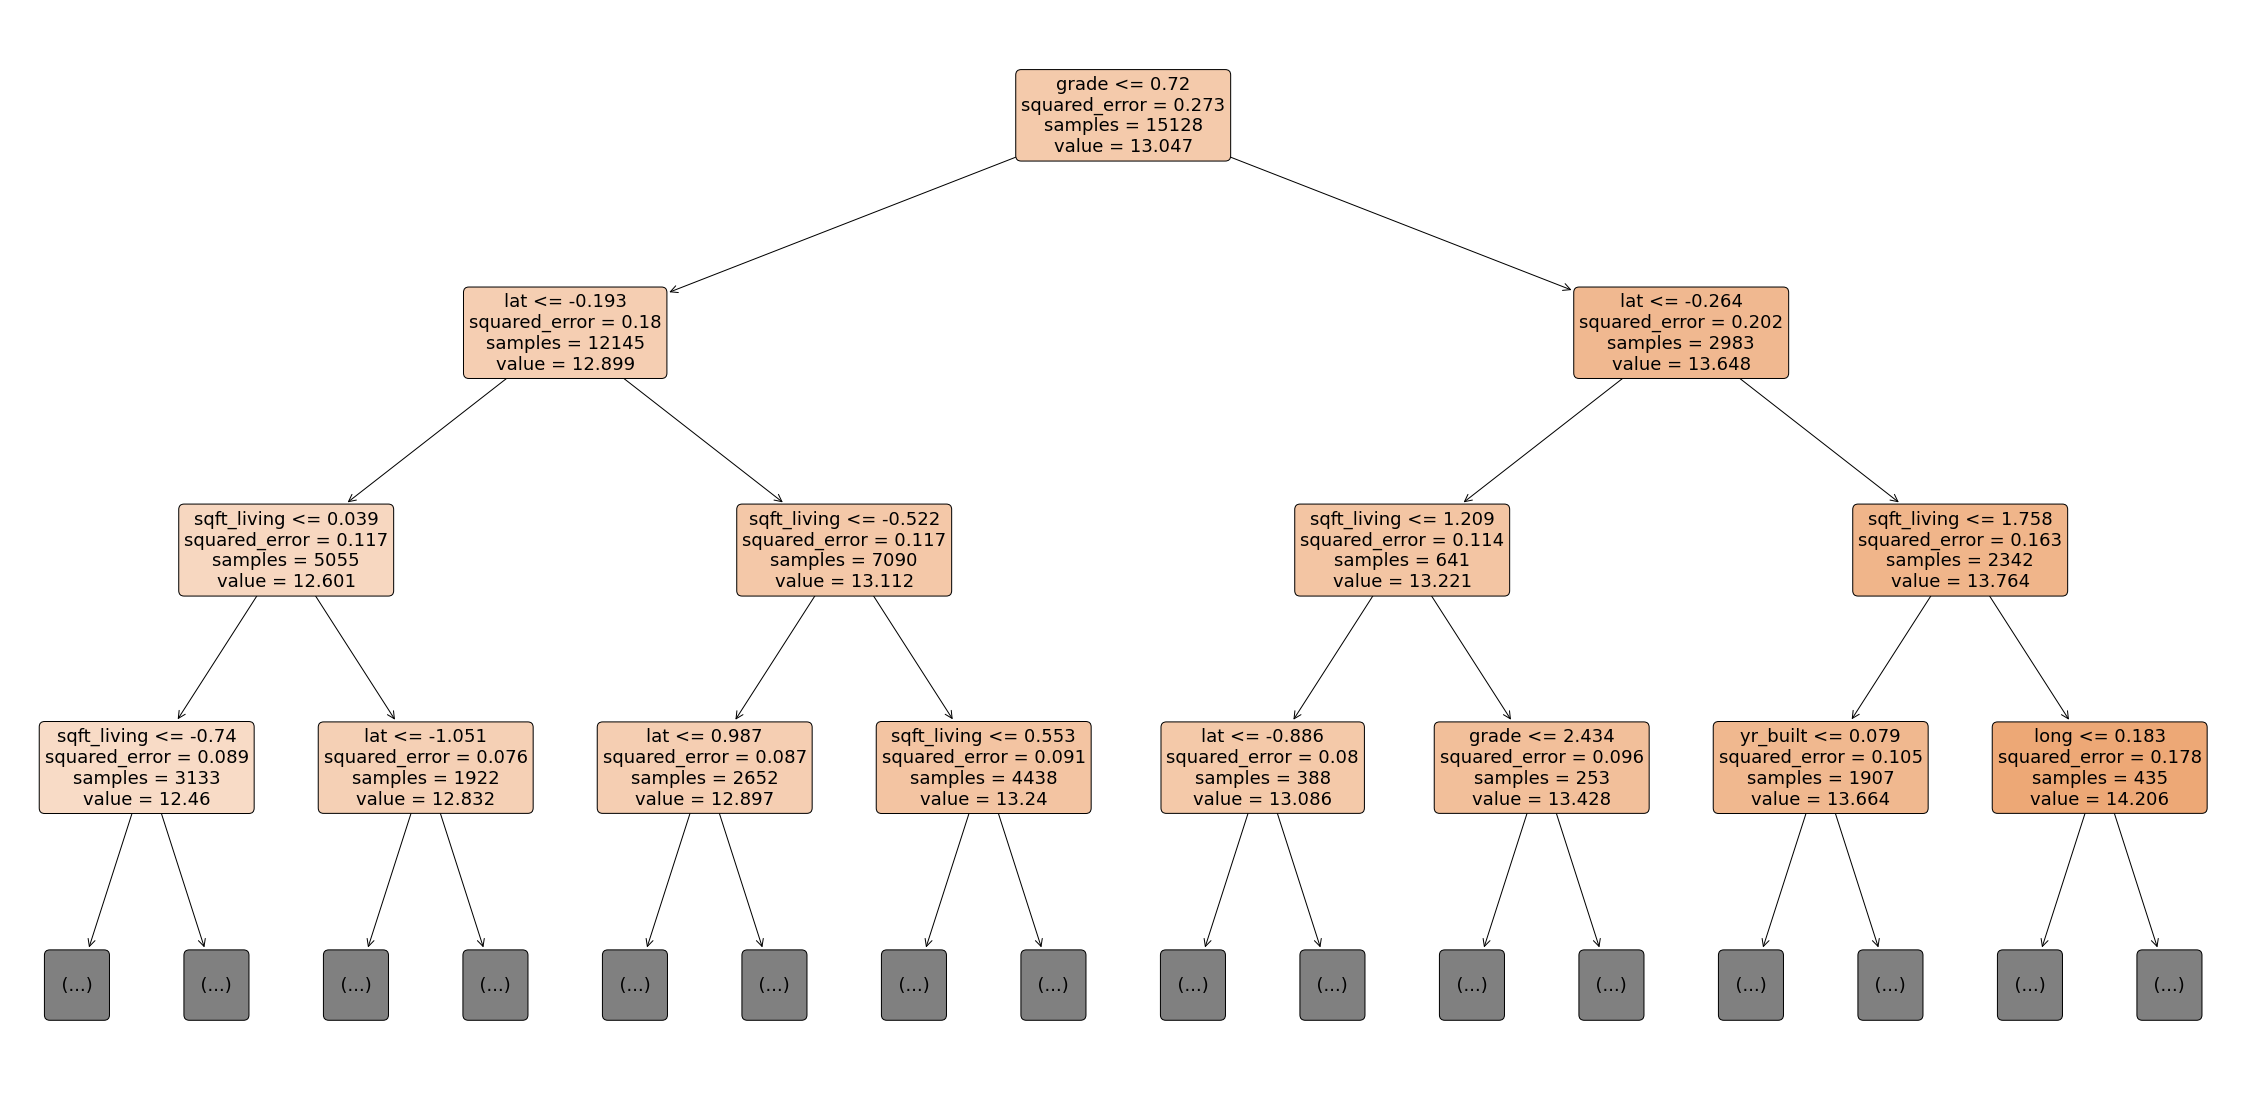

In [27]:
# plot the tree
plt.figure(figsize=(40,20))
plot_tree(DT, rounded=True, filled=True, fontsize=18, feature_names=X.columns.values, max_depth = 3)
plt.show()

# Model Evaluation

## <center>Train & Test Accuracy Scores<center>

In [28]:
# Unpivot the dataframe to plot graphs in seaborn
metric_df = metrics[['Train Score', 'Test Score']].reset_index().melt(id_vars = ['index'], value_vars = ['Train Score', 'Test Score'], value_name = 'Scores')
metric_df.rename({'index': 'Algorithm', 'variable': 'Dataset'}, inplace = True, axis = 1)
metric_df

,Algorithm,Dataset,Scores
0,Ridge Regressor,Train Score,76.887588
1,Decision Tree,Train Score,99.739373
2,Gradient Boosting,Train Score,88.569145
3,Bagging Regressor,Train Score,97.553868
4,Ridge Regressor,Test Score,77.831658
5,Decision Tree,Test Score,78.000168
6,Gradient Boosting,Test Score,88.129755
7,Bagging Regressor,Test Score,87.872195


Plotted bar plots to compare the train and test accuracy score of all models. Also, I can observe if there is any underfitting and overfitting for any of my models.

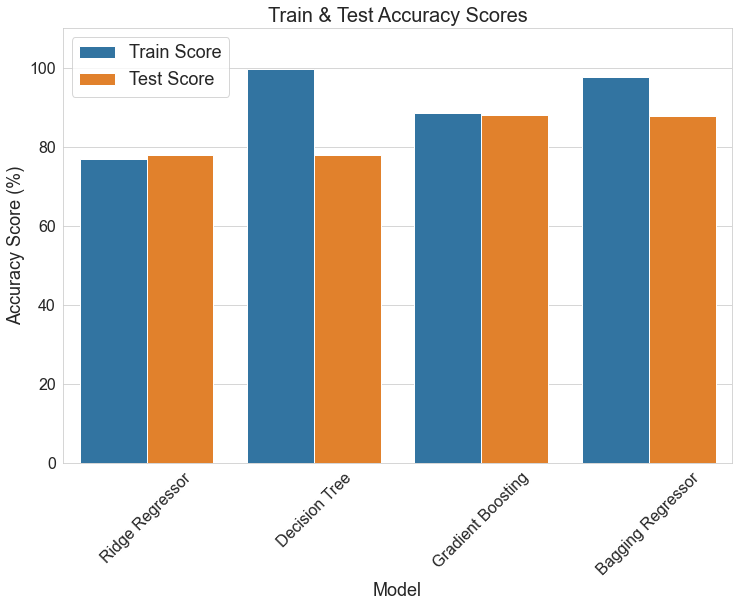

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
sns.barplot(data = metric_df, x = 'Algorithm', y = 'Scores', hue = 'Dataset')
plt.xticks(rotation = 45, fontsize = 16)
plt.xlabel('Model', fontsize = 18)
plt.ylim(0, 110)
plt.yticks(fontsize = 16)
plt.ylabel('Accuracy Score (%)', fontsize = 18)
plt.title('Train & Test Accuracy Scores', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 18)
plt.show()

## <center>Error Metrics<center>

In [30]:
# Unpivot the dataframe
error_df = metrics[['RMSE', 'MAE']].reset_index().melt(id_vars = ['index'], value_vars = ['RMSE', 'MAE'], value_name = 'Value')
error_df.rename({'index': 'Algorithm', 'variable': 'Error'}, inplace = True, axis = 1)
error_df

,Algorithm,Error,Value
0,Ridge Regressor,RMSE,0.252651
1,Decision Tree,RMSE,0.251689
2,Gradient Boosting,RMSE,0.184878
3,Bagging Regressor,RMSE,0.186873
4,Ridge Regressor,MAE,0.195167
5,Decision Tree,MAE,0.180212
6,Gradient Boosting,MAE,0.134810
7,Bagging Regressor,MAE,0.133695


Plotted a point plot to quantify how inaccurate the model predictions are.<br>
Gradient Boosting and Bagging Regressor have lower error rates.

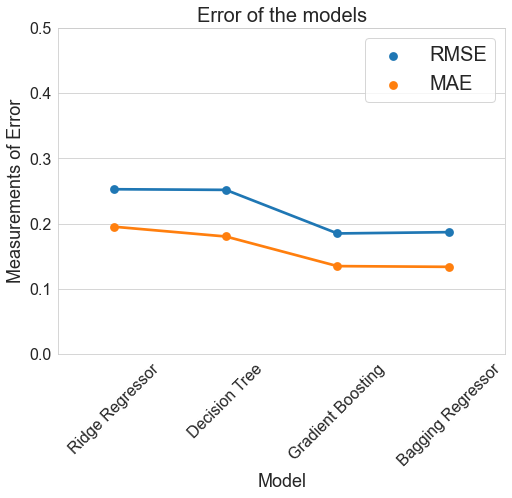

In [31]:
plt.figure(figsize = (8, 6))
sns.pointplot(data = error_df, x = 'Algorithm', y = 'Value', hue = 'Error')
plt.xticks(rotation = 45, fontsize = 16)
plt.xlabel('Model', fontsize = 18)
plt.ylim(0, 0.5)
plt.yticks(fontsize = 16)
plt.ylabel('Measurements of Error', fontsize = 18)
plt.title('Error of the models', fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

## <center>Residual Plot<center>

Plotted residual plots to observe how well the model fits the data. Residuals show the amount of error in the predictions by comparing the predicted y value with the actual y value.<br>
${e} = {y} - \hat{y} $<br>
The data points are scattered randomly with no specific pattern, this suggests that all models fit the data well.

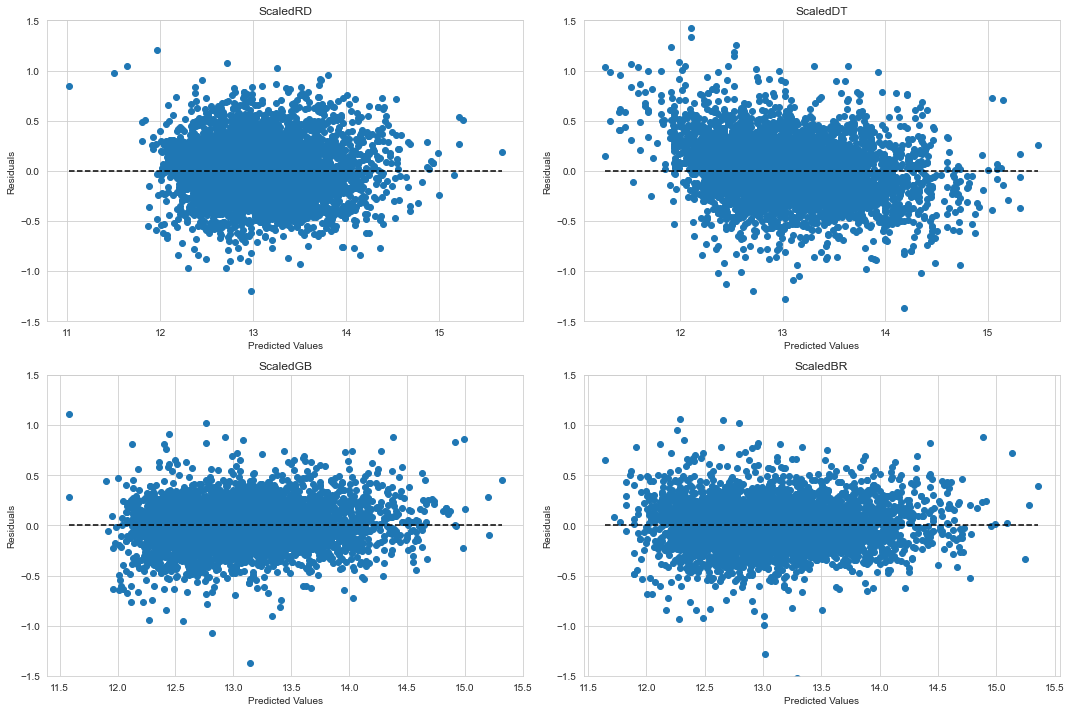

In [32]:
# Get residual and predicted values
residuals_res = [res[1] for res in pipe_results]
pred = [pred[2] for pred in pipe_results]
reg_names = [name for name, model in pipelines]
fig1, axes = plt.subplots(2, 2, figsize = (15, 10))

# plot residual plots
for reg, y_hat, residuals, ax in zip(reg_names, pred, residuals_res, axes.flatten()):
    ax.scatter(y_hat, residuals)
    ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), linestyle="--", color = 'k')
    ax.set_title(reg)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()

# Model Improvement

## Cross Validation
I created a `cross_validate` function to estimate the model's ability to predict new data. The function calculates the mean of the cross-validation scores for all algorithms. The scores outputted will be compared to the train accuracy score to check whether the model overfitted.

In [33]:
# define cv
cv = KFold(n_splits=5, random_state=1, shuffle=True)
def cross_validate(model):
    # evaluate model
    cv_scores = cross_val_score(model, X, y, cv=cv)
    # return mean of scores
    return np.mean(cv_scores)*100

# pass models into the cross_validate function
cv_results = [cross_validate(model) for name, model in pipelines]

# structure the result as a dataframe
cv_df = pd.DataFrame(cv_results, columns = ['Mean CV Score'], 
                     index = ['Ridge Regressor', 'Decision Tree', 'Gradient Boosting', 'Bagging Regressor'])

# compare the cv score to the train accuracy
cv_df['Train Score'] = metrics['Train Score']
cv_df

,Mean CV Score,Train Score
Ridge Regressor,77.350922,76.887588
Decision Tree,76.625056,99.739373
Gradient Boosting,87.832193,88.569145
Bagging Regressor,87.626029,97.553868


There is neither overfitting nor underfitting for the Ridge and the Gradient Boosting Regressors, these models are fit the data well. However, the Decision Tree and Bagging Regressors overfitted. The cross validation accuracy score of all models exceeded the baseline model's, except for the Decision Tree.

## Hyperparameter Tuning
I tuned the hyperparameters using GridSearchCV for the two models with the highest accuracy, Gradient Boosting and Bagging Regressor. When tuning, I also used 5-fold cross validation. <br>

Reasons for choice of hyperparameters (Gradient Boosting): <br>
max_depth: To achieve a better accuracy <br>
min_impurity_decrease: Split nodes that produces a decrease of the impurity greater than or equal to the value specified <br>
min_samples_leaf: Smooth the model to make patterns more noticeable

In [34]:
# # Gradient Boosting
# GB_param_grid = dict(max_depth=np.arange(6, 9), min_impurity_decrease=np.arange(0.1, 0.4, 0.1), min_samples_leaf=np.arange(10, 40, 10))
# GB_grid_search = GridSearchCV(estimator=GB, param_grid=GB_param_grid, cv=cv)
# GB_grid_result = GB_grid_search.fit(X, y)
# # summarize results
# print(f'Best Results: {GB_grid_result.best_score_:.5f} with {GB_grid_result.best_params_}')

Best Results: 0.90213 with {'max_depth': 8, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 30}


Reasons for choice of hyperparameter (Bagging Regressor):<br>
n_estimators: Improve the performance of the model.

In [35]:
# # Bagging Regressor
# BR_param_grid = dict(n_estimators=np.arange(100, 500, 100))
# BR_grid_search = GridSearchCV(estimator=BR, param_grid=BR_param_grid, cv=cv)
# BR_grid_result = BR_grid_search.fit(X, y)
# # summarize results
# print(f'Best Results: {BR_grid_result.best_score_:.5f} with {BR_grid_result.best_params_}')

KeyboardInterrupt: 

As the best max_depth value generated for the Gradient Boosting model was the last value in the range I provided, I did manual fine tuning for this model to test if other values of the hyperparameters will generate more accurate scores. I tried a maximum depth of 10, however the cross validation score is lower than when the maximum depth was 8 so I continued to use max_depth = 8.

In [ ]:
GB_ft = GradientBoostingRegressor(max_depth = 10, min_impurity_decrease = 0.1, min_samples_leaf = 30)
print(f'CV Accuracy Score: {cross_validate(GB_ft):.3f}%')

I passed in the best hyperparameters into the gradient boosting and bagging regressor models and trained them again.

In [ ]:
# passed hyperparameters into the model
GB_tuned = GradientBoostingRegressor(max_depth = 8, min_impurity_decrease = 0.1, min_samples_leaf = 30)
BR_tuned = BaggingRegressor(n_estimators = 400)

# create pipeline
pipelines_tuned = []
pipelines_tuned.append(('TunedGB', Pipeline([('Scaler', StandardScaler()),('GB', GB_tuned)])))
pipelines_tuned.append(('TunedBR', Pipeline([('Scaler', StandardScaler()),('BR', BR_tuned)])))

# present results
pipe_resultstuned = [train_model(model) for name, model in pipelines_tuned]
metrics_tuned = pd.DataFrame([res[0] for res in pipe_resultstuned], columns = ['Test Score', 'Train Score', 'RMSE', 'MAE'],
                      index = ['Gradient Boosting', 'Bagging Regressor'])
metrics_tuned

The accuracy for both models improved after tuning. The Gradient Boosting Regressor performed the best on the test data set though the difference between the train and test score increased slightly. The difference in train and test accuracy scores is still large for the Bagging Regressor.

# Model Evaluation (After Tuning)

In [ ]:
# Unpivot the dataframe
tunedmetric_df = metrics_tuned[['Train Score', 'Test Score']].reset_index().melt(id_vars = ['index'], value_vars = ['Train Score', 'Test Score'], value_name = 'Scores')
tunedmetric_df.rename({'index': 'Algorithm', 'variable': 'Dataset'}, inplace = True, axis = 1)
tunedmetric_df

Plotted bar plots to compare the train and test accuracy score of the Gradient Boosting and Bagging Regressors after tuning.

In [ ]:
plt.figure(figsize = (8, 6))
sns.barplot(data = tunedmetric_df, x = 'Algorithm', y = 'Scores', hue = 'Dataset')
plt.xticks(rotation = 45, fontsize = 16)
plt.xlabel('Model', fontsize = 18)
plt.ylim(0, 120)
plt.yticks(fontsize = 16)
plt.ylabel('Accuracy Score (%)', fontsize = 18)
plt.title('Train & Test Accuracy Scores', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 16)
plt.show()

# Feature Importance
Important features according to the Gradient Boosting Regressor (after tuning).

In [ ]:
# get importance
importance = GB_tuned.feature_importances_
scores = []
# summarize feature importance in a dataframe
for col, v in zip(X_train.columns.values, importance):
    scores.append([col, v])
feature_impt = pd.DataFrame(scores, columns = ['Features', 'Importance']).sort_values('Importance', ascending = False)
feature_impt

Plotted a bar graph to show with features the Gradient Boosting Regressor considers important.
According to the barplot, the most signficant features are `grade`, `lat` and `sqft_living`. While the feature importance is close to 0 for `bedrooms` and `floors`.

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(data = feature_impt, x = 'Features', y = 'Importance', palette = 'gnuplot')
plt.title(type(GB_tuned).__name__, size = 20)
plt.xticks(rotation = 45, size = 16)
plt.xlabel('Features', size = 18)
plt.ylabel('Importance', size = 18)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.show()

# Conclusion
- The Gradient Boosting Regressor performed the best as it has the highest accuracy and it neither overfitted nor underfitted the data. After hyperparameter tuning, the regressor returned a higher accuracy. Thus, it should be used to predict the house sale prices.
- The features to focus on are the latitude, grade, square foot of the living room as the Gradient Boosting model considers them as important features.